# Import and Global Variables

In [81]:
import pandas as pd
import os
import numpy as np
import matplotlib.ticker as mtick
from IPython.display import display, Markdown

In [187]:
working_directory = os.getcwd()
data_folder =  os.path.join(working_directory, "data")
results_folder = os.path.join(working_directory, "results")
acs_folder = os.path.join(data_folder,"ACS")
taz_folder = os.path.join(working_directory,"TAZ")
acs_filename = "ACSST5Y2018.S1401_data_with_overlays_2020-08-19T154101.csv"

remm_folder = os.path.join(data_folder,"REMM")
buildings_filename = os.path.join(remm_folder,"run1year2020allbuildings.csv")
parcel_taz_filename = os.path.join(remm_folder,"Parcel_TAZ.csv")
taz_filename = os.path.join(taz_folder,"TAZ.shp")

#column codes from ACS data, will verify later in process
public_col = "S1401_C03_010E" #Estimate!!In public school!!Population enrolled in college or graduate school
private_col = "S1401_C05_010E" #Estimate!!In private school!!Population enrolled in college or graduate school
total_col = "S1401_C01_010E" #Estimate!!Total!!Population enrolled in college or graduate school

public = "ACS_Public"
private = "ACS_Private"
total = "ACS_Total"

print(working_directory)
print(data_folder)
print(results_folder)
print(acs_folder)

E:\GitHub\College-Enrollment-2020
E:\GitHub\College-Enrollment-2020\data
E:\GitHub\College-Enrollment-2020\results
E:\GitHub\College-Enrollment-2020\data\ACS


# Import and Process ACS Data

In [83]:
acs_csv = os.path.join(acs_folder, acs_filename)

#csv has two header rows
df_acs = pd.read_csv(acs_csv, header=[0,1])

#drop the second header row to allow ease of calcs
df_acs.columns = df_acs.columns.droplevel(1)

df_acs.head()

,GEO_ID,NAME,S1401_C01_001E,S1401_C01_001M,S1401_C02_001E,S1401_C02_001M,S1401_C03_001E,S1401_C03_001M,S1401_C04_001E,S1401_C04_001M,...,S1401_C02_034E,S1401_C02_034M,S1401_C03_034E,S1401_C03_034M,S1401_C04_034E,S1401_C04_034M,S1401_C05_034E,S1401_C05_034M,S1401_C06_034E,S1401_C06_034M
0,1400000US49035100100,"Census Tract 1001, Salt Lake County, Utah",568,148,(X),(X),(X),(X),75.2,15.9,...,79.7,22.2,102,85,100.0,25.1,0,11,0.0,25.1
1,1400000US49035100200,"Census Tract 1002, Salt Lake County, Utah",207,83,(X),(X),(X),(X),54.1,19.7,...,38.8,29.8,14,16,45.2,52.4,17,25,54.8,52.4
2,1400000US49035100306,"Census Tract 1003.06, Salt Lake County, Utah",1524,325,(X),(X),(X),(X),99.5,0.8,...,12.8,12.5,41,43,100.0,44.5,0,16,0.0,44.5
3,1400000US49035100307,"Census Tract 1003.07, Salt Lake County, Utah",1946,285,(X),(X),(X),(X),93.1,3.3,...,26.5,20.3,57,45,100.0,37.7,0,16,0.0,37.7
4,1400000US49035100308,"Census Tract 1003.08, Salt Lake County, Utah",1433,318,(X),(X),(X),(X),95.1,3.8,...,15.0,17.3,57,55,100.0,37.7,0,11,0.0,37.7


In [84]:
#read in first row of data to check column heads IDs and matching descriptions
df_rowheads = pd.read_csv(acs_csv, nrows=1)

#function to return column description given the column name
def get_col_desc(col_name):
    return df_rowheads[col_name][0]

df_rowheads

,GEO_ID,NAME,S1401_C01_001E,S1401_C01_001M,S1401_C02_001E,S1401_C02_001M,S1401_C03_001E,S1401_C03_001M,S1401_C04_001E,S1401_C04_001M,...,S1401_C02_034E,S1401_C02_034M,S1401_C03_034E,S1401_C03_034M,S1401_C04_034E,S1401_C04_034M,S1401_C05_034E,S1401_C05_034M,S1401_C06_034E,S1401_C06_034M
0,id,Geographic Area Name,Estimate!!Total!!Population 3 years and over e...,Margin of Error!!Total MOE!!Population 3 years...,Estimate!!Percent!!Population 3 years and over...,Margin of Error!!Percent MOE!!Population 3 yea...,Estimate!!In public school!!Population 3 years...,Margin of Error!!In public school MOE!!Populat...,Estimate!!Percent in public school!!Population...,Margin of Error!!Percent in public school MOE!...,...,Estimate!!Percent!!Females 18 to 24 years!!Enr...,Margin of Error!!Percent MOE!!Females 18 to 24...,Estimate!!In public school!!Females 18 to 24 y...,Margin of Error!!In public school MOE!!Females...,Estimate!!Percent in public school!!Females 18...,Margin of Error!!Percent in public school MOE!...,Estimate!!In private school!!Females 18 to 24 ...,Margin of Error!!In private school MOE!!Female...,Estimate!!Percent in private school!!Females 1...,Margin of Error!!Percent in private school MOE...


In [85]:
#very column names for public, private, and total
print(public + ": " + get_col_desc(public_col))
print(private + ": " + get_col_desc(private_col))
print(total + ": " + get_col_desc(total_col))

ACS_Public: Estimate!!In public school!!Population enrolled in college or graduate school
ACS_Private: Estimate!!In private school!!Population enrolled in college or graduate school
ACS_Total: Estimate!!Total!!Population enrolled in college or graduate school


In [86]:
#create dataset with just the columns we want
df_acs_college = df_acs[['GEO_ID', 'NAME', public_col, private_col, total_col]].copy()

#rename columns from weird code to something normal
df_acs_college = df_acs_college.rename(columns={public_col: public, private_col: private, total_col: total})

df_acs_college.head()

,GEO_ID,NAME,ACS_Public,ACS_Private,ACS_Total
0,1400000US49035100100,"Census Tract 1001, Salt Lake County, Utah",235,87,322
1,1400000US49035100200,"Census Tract 1002, Salt Lake County, Utah",82,22,104
2,1400000US49035100306,"Census Tract 1003.06, Salt Lake County, Utah",232,0,232
3,1400000US49035100307,"Census Tract 1003.07, Salt Lake County, Utah",260,63,323
4,1400000US49035100308,"Census Tract 1003.08, Salt Lake County, Utah",384,55,439


In [87]:
#Create column with County FIPS value to do some rough calculations
def mid(s, offset, amount):
    return s[offset:offset+amount]

#test=mid("1400000US49035100100", 11, 3)
#print(test)

#get county fips, don't know how to code series, so add individual charaters 11-13
df_acs_college['County'] = df_acs_college['GEO_ID'].str[11] + df_acs['GEO_ID'].str[12] + df_acs['GEO_ID'].str[13]

df_acs_college['County']

0      035
1      035
2      035
3      035
4      035
      ... 
450    003
451    003
452    003
453    003
454    003
Name: County, Length: 455, dtype: object

In [88]:
#create GEOID column with just the ending of the GEO_ID column, to have a value that matches tract dataset
#don't know how to code series, so add individual charaters 9-19
df_acs_college['GEOID'] = df_acs_college['GEO_ID'].str[9] + df_acs['GEO_ID'].str[10] + df_acs_college['GEO_ID'].str[11] + df_acs['GEO_ID'].str[12] + df_acs['GEO_ID'].str[13] + df_acs['GEO_ID'].str[14] + df_acs['GEO_ID'].str[15] + df_acs['GEO_ID'].str[16] + df_acs['GEO_ID'].str[17] + df_acs['GEO_ID'].str[18] + df_acs['GEO_ID'].str[19]

df_acs_college['GEOID']

0      49035100100
1      49035100200
2      49035100306
3      49035100307
4      49035100308
          ...     
450    49003960602
451    49003960701
452    49003960702
453    49003960801
454    49003960802
Name: GEOID, Length: 455, dtype: object

In [89]:
#get number of students by county
df_acs_college.groupby(['County']).agg({public: [np.size, np.sum], private: [np.size, np.sum], total: [np.size, np.sum]})

ACS_Public        ACS_Private        ACS_Total       
             size    sum        size    sum      size    sum
County                                                      
003            11   1990          11    516        11   2506
011            54  19518          54   4044        54  23562
035           212  64904         212  16484       212  81388
049           128  35476         128  39943       128  75419
057            50  13707          50   2336        50  16043

In [90]:
#get number of students for region
#this includes all attending in region schools, so also includes those living outside region like Park City and Tooele)
df_acs_college.groupby(['County']).agg({public: [np.size, np.sum], private: [np.size, np.sum], total: [np.size, np.sum]}).sum()

ACS_Public   size       455
             sum     135595
ACS_Private  size       455
             sum      63323
ACS_Total    size       455
             sum     198918
dtype: int64

In [91]:
#import arcgis libraries
from arcgis.gis import *
gis = GIS()

In [92]:
shp_tract = os.path.join(acs_folder, r"tl_2018_49_tract\tl_2018_49_tract.shp")
print(shp_tract)
sdf_tract = pd.DataFrame.spatial.from_featureclass(shp_tract)
sdf_tract = sdf_tract.drop(columns=['FID', 'NAME','NAMELSAD','MTFCC','FUNCSTAT','ALAND','AWATER','INTPTLAT','INTPTLON'])
sdf_tract.head()

E:\GitHub\College-Enrollment-2020\data\ACS\tl_2018_49_tract\tl_2018_49_tract.shp


,STATEFP,COUNTYFP,TRACTCE,GEOID,SHAPE
0,49,049,001001,49049001001,"{""rings"": [[[-111.695025, 40.297128], [-111.69..."
1,49,049,001002,49049001002,"{""rings"": [[[-111.691801, 40.289775], [-111.68..."
2,49,049,001103,49049001103,"{""rings"": [[[-111.724595, 40.282503], [-111.72..."
3,49,049,001201,49049001201,"{""rings"": [[[-111.718699, 40.27531], [-111.718..."
4,49,049,001202,49049001202,"{""rings"": [[[-111.695103, 40.273556], [-111.69..."


In [93]:
#create map1 with zoom set to Salt Lake (any city or place name can be used)
map1 = gis.map('Salt Lake')

#add tract sdf
sdf_tract.spatial.plot(map_widget = map1,
                       renderer_type='u', # specify the unique value renderer using its notation 'u'
                       col='GEOID'  # column to get unique values from
                       )

map1.layout.height='600px'

#add map title
display(Markdown('<h1><center>Census Tracts</center></h1>'))

#display the map
map1

<h1><center>Census Tracts</center></h1>

MapView(layout=Layout(height='600px', width='100%'))

In [94]:
sdf_tract_college = pd.merge(sdf_tract, df_acs_college, on = 'GEOID', how='inner')
sdf_tract_college.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,SHAPE,GEO_ID,NAME,ACS_Public,ACS_Private,ACS_Total,County
0,49,049,001001,49049001001,"{'rings': [[[-111.695025, 40.297128], [-111.69...",1400000US49049001001,"Census Tract 10.01, Utah County, Utah",137,86,223,049
1,49,049,001002,49049001002,"{'rings': [[[-111.691801, 40.289775], [-111.68...",1400000US49049001002,"Census Tract 10.02, Utah County, Utah",172,115,287,049
2,49,049,001103,49049001103,"{'rings': [[[-111.724595, 40.282503], [-111.72...",1400000US49049001103,"Census Tract 11.03, Utah County, Utah",417,112,529,049
3,49,049,001201,49049001201,"{'rings': [[[-111.718699, 40.27531], [-111.718...",1400000US49049001201,"Census Tract 12.01, Utah County, Utah",713,187,900,049
4,49,049,001202,49049001202,"{'rings': [[[-111.695103, 40.273556], [-111.69...",1400000US49049001202,"Census Tract 12.02, Utah County, Utah",710,235,945,049


In [95]:
sdf_tract_college[['GEOID',public,private,total]].sort_values(by=total, ascending=False).head(10)

,GEOID,ACS_Public,ACS_Private,ACS_Total
25,49049001802,1090,4580,5670
322,49049001801,659,4256,4915
57,49035101400,3033,685,3718
316,49049001601,553,2696,3249
6,49049001402,1371,1705,3076
317,49049001602,347,2190,2537
321,49049001603,427,2092,2519
324,49049001900,554,1920,2474
158,49049002201,1490,929,2419
257,49049001702,656,1581,2237


# Public School Enrollment

In [96]:
arcade_expression = ("var v = $feature." + public + ";"
                     "if (v<250) {"
                     "  return 'class1';"
                     "} else if (v<1000) {"
                     "  return 'class2';"
                     "} else if (v<2000) {"
                     "  return 'class3';"
                     "} else if (v<3000) {"
                     "  return 'class4';"
                     "} else {"
                     "  return 'class5';"
                     "}"
                    )

uv = [{"value":"class1", "label":"Less than 250","symbol":{"type":"esriSFS","color":[130,165,217,168],
                                                           "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                      "width":1.5,"style":"esriSLSSolid"},
                                                           "style":"esriSFSSolid"}},
      {"value":"class2", "label":"250 to 1,000","symbol":{"type":"esriSFS","color":[140,125,164,168],
                                                          "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                     "width":1.5,"style":"esriSLSSolid"},
                                                          "style":"esriSFSSolid"}},
      {"value":"class3", "label":"1,000 to 2,000","symbol":{"type":"esriSFS","color":[149,85,111,168],
                                                                   "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                              "width":1.5,"style":"esriSLSSolid"},
                                                                   "style":"esriSFSSolid"}},
      {"value":"class4", "label":"2,000 to 3,000","symbol":{"type":"esriSFS","color":[159,44,57,168],
                                                            "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                       "width":1.5,"style":"esriSLSSolid"},
                                                            "style":"esriSFSSolid"}},
      {"value":"class5", "label":"More than 3,000","symbol":{"type":"esriSFS","color":[168,4,4,168],
                                                             "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                        "width":1.5,"style":"esriSLSSolid"},
                                                             "style":"esriSFSSolid"}}]

In [97]:
# df_basedist_rows_instsite_zipcode
map2 = gis.map('Salt Lake')

sdf_tract_college.spatial.plot(map_widget = map2,
                               renderer_type='u-a', #'u-a' stands for uniqe value with arcade expression
                               unique_values=uv,
                               arcade_expression=arcade_expression,
                               default_symbol="" #don't include an 'other' category
                               )
map2.layout.height='500px'
map2.legend=True

display(Markdown('<h1><center>Public College Students by Census Tracts</center></h1>'))

map2

<h1><center>Public College Students by Census Tracts</center></h1>

MapView(layout=Layout(height='500px', width='100%'), legend=True)

In [98]:
sdf_tract_college[['GEOID',public,private,total]].sort_values(by=public, ascending=False).head(10)

,GEOID,ACS_Public,ACS_Private,ACS_Total
57,49035101400,3033,685,3718
155,49035113107,1520,244,1764
158,49049002201,1490,929,2419
6,49049001402,1371,1705,3076
75,49035101600,1311,73,1384
123,49035113020,1214,206,1420
76,49035101700,1093,61,1154
25,49049001802,1090,4580,5670
74,49035101500,977,49,1026
77,49035101800,960,138,1098


# Private School Enrollment

In [99]:
arcade_expression_private = ("var private = $feature." + private + ";"
                     "if (private<250) {"
                     "  return 'class1';"
                     "} else if (private<1000) {"
                     "  return 'class2';"
                     "} else if (private<2000) {"
                     "  return 'class3';"
                     "} else if (private<3000) {"
                     "  return 'class4';"
                     "} else {"
                     "  return 'class5';"
                     "}"
                    )

uv_private = [{"value":"class1", "label":"Less than 250","symbol":{"type":"esriSFS","color":[130,165,217,168],
                                    "outline":{"type":"esriSLS","color":[255,255,255,51],
                                               "width":1.5,"style":"esriSLSSolid"},
                                    "style":"esriSFSSolid"}},
      {"value":"class2", "label":"250 to 1,000","symbol":{"type":"esriSFS","color":[140,125,164,168],
                                    "outline":{"type":"esriSLS","color":[255,255,255,51],
                                               "width":1.5,"style":"esriSLSSolid"},
                                    "style":"esriSFSSolid"}},
      {"value":"class3", "label":"1,000 to 2,000","symbol":{"type":"esriSFS","color":[149,85,111,168],
                                                        "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                   "width":1.5,"style":"esriSLSSolid"},
                                                        "style":"esriSFSSolid"}},
      {"value":"class4", "label":"2,000 to 3,000","symbol":{"type":"esriSFS","color":[159,44,57,168],
                                                   "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                              "width":1.5,"style":"esriSLSSolid"},
                                                   "style":"esriSFSSolid"}},
      {"value":"class5", "label":"More than 3,000","symbol":{"type":"esriSFS","color":[168,4,4,168],
                                                   "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                              "width":1.5,"style":"esriSLSSolid"},
                                                   "style":"esriSFSSolid"}}]

In [100]:
map3 = gis.map('Provo')

sdf_tract_college.spatial.plot(map_widget = map3,
                               renderer_type='u-a', #'u-a' stands for uniqe value with arcade expression
                               unique_values=uv_private,
                               arcade_expression=arcade_expression_private,
                               default_symbol="" #don't include an 'other' category
                               )
map3.layout.height='500px'

map3.legend=True

display(Markdown('<h1><center>Private College Students by Census Tracts</center></h1>'))

map3

<h1><center>Private College Students by Census Tracts</center></h1>

MapView(layout=Layout(height='500px', width='100%'), legend=True)

In [101]:
sdf_tract_college[['GEOID',public,private,total]].sort_values(by=private, ascending=False).head(10)

,GEOID,ACS_Public,ACS_Private,ACS_Total
25,49049001802,1090,4580,5670
322,49049001801,659,4256,4915
316,49049001601,553,2696,3249
317,49049001602,347,2190,2537
321,49049001603,427,2092,2519
324,49049001900,554,1920,2474
6,49049001402,1371,1705,3076
257,49049001702,656,1581,2237
326,49049001504,316,998,1314
158,49049002201,1490,929,2419


# Join tract data to zip codes to allow comparison to headcount data

In [102]:
#get coordinates of centroid of sdf, just as test
print(sdf_tract_college.spatial.centroid)

(-111.87805550295506, 40.67226738055238)


In [103]:
#get coordinates of centroid of first shape in sdf, just as test
sdf_tract_college.iloc[0].SHAPE.centroid

(-111.68121272633924, 40.293478015263)

In [104]:
#create column with x and y coordinates of centroids
sdf_tract_centroid = sdf_tract_college[['GEOID','SHAPE',public,private,total]].copy()
sdf_tract_centroid['x_lon'] = sdf_tract_centroid.apply(lambda row: row.SHAPE.centroid[0], axis = 1)
sdf_tract_centroid['y_lat'] = sdf_tract_centroid.apply(lambda row: row.SHAPE.centroid[1], axis = 1)

sdf_tract_centroid.head()

,GEOID,SHAPE,ACS_Public,ACS_Private,ACS_Total,x_lon,y_lat
0,49049001001,"{""rings"": [[[-111.695025, 40.297128], [-111.69...",137,86,223,-111.681213,40.293478
1,49049001002,"{""rings"": [[[-111.691801, 40.289775], [-111.68...",172,115,287,-111.679244,40.286163
2,49049001103,"{""rings"": [[[-111.724595, 40.282503], [-111.72...",417,112,529,-111.707977,40.278494
3,49049001201,"{""rings"": [[[-111.718699, 40.27531], [-111.718...",713,187,900,-111.703633,40.267030
4,49049001202,"{""rings"": [[[-111.695103, 40.273556], [-111.69...",710,235,945,-111.688634,40.266217


In [105]:
#create sdf of just centroid points
#use from_xy functionality to give points shape
sdf_points = pd.DataFrame.spatial.from_xy(sdf_tract_centroid,'x_lon','y_lat') 

In [106]:
#verify that shape exists and sdf was created correctly
print(sdf_points.iloc[0].SHAPE)

{'spatialReference': {'wkid': 4326}, 'x': -111.68121272633924, 'y': 40.293478015263}


In [107]:
#import zip DataFrame from shapefile
zip_shp = working_directory + r"\ZIPCode\ZIPCode.shp"
sdf_zip = pd.DataFrame.spatial.from_featureclass(zip_shp)

In [108]:
#check attribute of bounding box of zip sdf
print(sdf_zip.spatial.bbox)

{'rings': [[[228585.5, 4094775.51], [228585.5, 4653578.01], [673940.5, 4653578.01], [673940.5, 4094775.51], [228585.5, 4094775.51]]], 'spatialReference': {'wkid': 26912, 'latestWkid': 26912}}


In [109]:
#change projection to WGS84 to match tracts
sdf_zip.spatial.project(4326)

True

In [110]:
#check projection change by looking at bounding box coordinates
print(sdf_zip.spatial.bbox)

{'rings': [[[-114.05292513469266, 36.99769411237049], [-114.05292513469266, 42.00171782734483], [-109.04150092483052, 42.00171782734483], [-109.04150092483052, 36.99769411237049], [-114.05292513469266, 36.99769411237049]]], 'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}


In [111]:
#spatial join tract centroid data to zip code data
sdf_tract_zipjoin = sdf_tract_centroid.spatial.join(sdf_zip)

sdf_tract_zipjoin.head()

,GEOID,SHAPE,ACS_Public,ACS_Private,ACS_Total,x_lon,y_lat,index_right,FID,zip5,countynbr,name,symbol
0,49049001001,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",137,86,223,-111.681213,40.293478,53,53,84097,25,OREM,2
1,49049001002,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",172,115,287,-111.679244,40.286163,53,53,84097,25,OREM,2
2,49049001300,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",306,216,522,-111.677061,40.274199,53,53,84097,25,OREM,2
3,49049000710,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",141,105,246,-111.683160,40.330126,53,53,84097,25,OREM,2
4,49049000903,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",166,98,264,-111.674051,40.308444,53,53,84097,25,OREM,2


In [112]:
mt = gis.map('Salt Lake')
sdf_tract_zipjoin.spatial.plot(map_widget=mt)

#add map title
display(Markdown('<h1><center>Census Tracts Centroids Joined to Zip Codes</center></h1>'))

mt

<h1><center>Census Tracts Centroids Joined to Zip Codes</center></h1>

MapView(layout=Layout(height='400px', width='100%'))

In [113]:
#create dataframe with data aggregated to zip code
df_acs_zip = sdf_tract_zipjoin.groupby(['zip5'], as_index=False).agg({public: [np.sum],private: [np.sum],total: [np.sum]})

#collapse multi-level
df_acs_zip.columns = df_acs_zip.columns.get_level_values(0)

df_acs_zip.head()

,zip5,ACS_Public,ACS_Private,ACS_Total
0,84003,2378,683,3061
1,84004,715,399,1114
2,84005,1176,459,1635
3,84009,1432,233,1665
4,84010,2876,793,3669


In [114]:
#create joining field
df_acs_zip['zip5int'] =  df_acs_zip.apply(lambda row: int(row.zip5), axis = 1)

#check sums
df_acs_zip.sum()

zip5                 inf
ACS_Public      135595.0
ACS_Private      63323.0
ACS_Total       198918.0
zip5int        7156203.0
dtype: float64

# Bring in headcount data and compare to ACS data

In [115]:
# Read 2020 csv as pandas dataframe object
csv_HC = os.path.join(data_folder, 'headcount.csv')
print(csv_HC)
df_HC = pd.read_csv(csv_HC)

E:\GitHub\College-Enrollment-2020\data\headcount.csv


In [116]:
#group data by zip code
df_HC_zip = df_HC.groupby('ZIP_Code', as_index=False).agg({'Headcount': [np.sum]})

#collapse multi-level
df_HC_zip.columns = df_HC_zip.columns.get_level_values(0)

df_HC_zip.head()

,ZIP_Code,Headcount
0,84001,4
1,84003,1843
2,84004,423
3,84005,792
4,84006,17


In [117]:
#join tract data to zip data on Zip Code
df_acs_hc_zip = pd.merge(df_acs_zip, df_HC_zip, left_on = 'zip5int', right_on = 'ZIP_Code', how='inner')


df_acs_hc_zip.head()

,zip5,ACS_Public,ACS_Private,ACS_Total,zip5int,ZIP_Code,Headcount
0,84003,2378,683,3061,84003,84003,1843
1,84004,715,399,1114,84004,84004,423
2,84005,1176,459,1635,84005,84005,792
3,84009,1432,233,1665,84009,84009,1147
4,84010,2876,793,3669,84010,84010,1639


In [118]:
#create date frame for totals used in shares calc
df_acs_hc_zip_totals = df_acs_hc_zip.sum()

#variables for holding totals that will be used in cacluating shares
public_Total = df_acs_hc_zip_totals.filter(items=([public])).iloc[0]
private_Total = df_acs_hc_zip_totals.filter(items=([private])).iloc[0]
total_Total = df_acs_hc_zip_totals.filter(items=([total])).iloc[0]
Headcount_Total =  df_acs_hc_zip_totals.filter(items=(['Headcount'])).iloc[0]

print(public_Total)
print(private_Total)
print(total_Total)
print(Headcount_Total)

#calcuate shares
df_acs_hc_zip[public + "_Share"] = df_acs_hc_zip[public] / public_Total * 100
df_acs_hc_zip[private + "_Share"] = df_acs_hc_zip[private] / private_Total * 100
df_acs_hc_zip[total + "_Share"] = df_acs_hc_zip[total] / total_Total * 100
df_acs_hc_zip["Headcount_Share"] = df_acs_hc_zip.Headcount / Headcount_Total * 100

#check output
print(df_acs_hc_zip.sum())

135336.0
63145.0
198481.0
89493.0
zip5                       inf
ACS_Public            135336.0
ACS_Private            63145.0
ACS_Total             198481.0
zip5int              7072053.0
ZIP_Code             7072053.0
Headcount              89493.0
ACS_Public_Share         100.0
ACS_Private_Share        100.0
ACS_Total_Share          100.0
Headcount_Share          100.0
dtype: float64


In [119]:
#calculate differences between two dataframes 
df_acs_hc_zip['Diff'] =  df_acs_hc_zip.apply(lambda row: df_acs_hc_zip[public].iloc[row.name] - row.Headcount, axis = 1)
df_acs_hc_zip['Diff_Share'] =  df_acs_hc_zip.apply(lambda row: df_acs_hc_zip[public+'_Share'].iloc[row.name] - row.Headcount_Share, axis = 1)
df_acs_hc_zip.head()

,zip5,ACS_Public,ACS_Private,ACS_Total,zip5int,ZIP_Code,Headcount,ACS_Public_Share,ACS_Private_Share,ACS_Total_Share,Headcount_Share,Diff,Diff_Share
0,84003,2378,683,3061,84003,84003,1843,1.757108,1.081638,1.542213,2.059379,535,-0.302271
1,84004,715,399,1114,84004,84004,423,0.528315,0.631879,0.561263,0.472663,292,0.055652
2,84005,1176,459,1635,84005,84005,792,0.868948,0.726898,0.823756,0.884985,384,-0.016037
3,84009,1432,233,1665,84009,84009,1147,1.058107,0.368992,0.838871,1.281664,285,-0.223557
4,84010,2876,793,3669,84010,84010,1639,2.125081,1.255840,1.848540,1.831428,1237,0.293653


In [120]:
#join back to tract sdf to display results 
#add field to join to and join
sdf_zip['zip5int'] =  sdf_zip.apply(lambda row: int(row.zip5), axis = 1)
sdf_acs_hc_zip = pd.merge(sdf_zip, df_acs_hc_zip, on='zip5int', how='inner')

sdf_acs_hc_zip.head()

,FID,zip5_x,countynbr,name,symbol,SHAPE,zip5int,zip5_y,ACS_Public,ACS_Private,ACS_Total,ZIP_Code,Headcount,ACS_Public_Share,ACS_Private_Share,ACS_Total_Share,Headcount_Share,Diff,Diff_Share
0,11,84045,25,SARATOGA SPRINGS,2,"{'rings': [[[-111.94410643903683, 40.361986189...",84045,84045,608,214,822,84045,749,0.449252,0.338903,0.414145,0.836937,-141,-0.387685
1,12,84013,25,CEDAR VALLEY,3,"{'rings': [[[-112.11215718262726, 40.438973308...",84013,84013,74,52,126,84013,27,0.054679,0.082350,0.063482,0.030170,47,0.024509
2,13,84065,18,RIVERTON,5,"{'rings': [[[-111.91748781450835, 40.537558607...",84065,84065,2453,744,3197,84065,1522,1.812526,1.178241,1.610734,1.700692,931,0.111834
3,14,84070,18,SANDY,1,"{'rings': [[[-111.87217118351592, 40.608384994...",84070,84070,1274,584,1858,84070,916,0.941361,0.924855,0.936110,1.023544,358,-0.082183
4,15,84094,18,SANDY,3,"{'rings': [[[-111.85322813634012, 40.580440999...",84094,84094,1200,414,1614,84094,955,0.886682,0.655634,0.813176,1.067123,245,-0.180441


In [121]:
#create expressions for displaying class breaks on map
arcade_expression_diff = ("var diff = $feature.Diff_Share;"
                     "if (diff<-.6) {"
                     "  return 'class1';"
                     "} else if (diff<-.2) {"
                     "  return 'class2';"
                     "} else if (diff<-.1) {"
                     "  return 'class3';"
                     "} else if (diff<.1) {"
                     "  return 'class4';"
                     "} else if (diff<.2) {"
                     "  return 'class5';"
                     "} else if (diff<.6) {"
                     "  return 'class6';"
                     "} else {"
                     "  return 'class7';"
                     "}"
                    )

uv_diff = [{"value":"class1", "label":"Less than -0.60%","symbol":{"type":"esriSFS","color":[17,168,3,168],
                                                           "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                      "width":1.5,"style":"esriSLSSolid"},
                                                           "style":"esriSFSSolid"}},
      {"value":"class2", "label":"-0.60% to -0.20%","symbol":{"type":"esriSFS","color":[78,193,67,168],
                                                          "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                     "width":1.5,"style":"esriSLSSolid"},
                                                          "style":"esriSFSSolid"}},
      {"value":"class3", "label":"-0.20% to -0.1%","symbol":{"type":"esriSFS","color":[139,217,130,168],
                                                          "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                     "width":1.5,"style":"esriSLSSolid"},
                                                          "style":"esriSFSSolid"}},
      {"value":"class4", "label":"-0.1% to +0.1%","symbol":{"type":"esriSFS","color":[220,220,220,168],
                                                                   "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                              "width":1.5,"style":"esriSLSSolid"},
                                                                   "style":"esriSFSSolid"}},
      {"value":"class5", "label":"+0.1% to +0.20%","symbol":{"type":"esriSFS","color":[217,130,130,168],
                                                            "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                       "width":1.5,"style":"esriSLSSolid"},
                                                            "style":"esriSFSSolid"}},
      {"value":"class6", "label":"+0.20% to +0.60%","symbol":{"type":"esriSFS","color":[193,67,67,168],
                                                             "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                        "width":1.5,"style":"esriSLSSolid"},
                                                             "style":"esriSFSSolid"}},
      {"value":"class7", "label":"More +0.60%","symbol":{"type":"esriSFS","color":[168,4,4,168],
                                                             "outline":{"type":"esriSLS","color":[255,255,255,51],
                                                                        "width":1.5,"style":"esriSLSSolid"},
                                                             "style":"esriSFSSolid"}}]

In [122]:
#create map for displaying shares differences
map_diff = gis.map('Salt Lake')
sdf_acs_hc_zip.spatial.plot(map_widget = map_diff,
                               renderer_type='u-a', #'u-a' stands for uniqe value with arcade expression
                               unique_values=uv_diff,
                               arcade_expression=arcade_expression_diff,
                               default_symbol="" #don't include an 'other' category
                              )
map_diff.layout.height = '700px'
map_diff.legend=True

#add map title
display(Markdown('<h1><center>Share Difference - ACS vs Headcount</center></h1>'))

map_diff

#Red: ACS Public high
#Green: Headcount high

<h1><center>Share Difference - ACS vs Headcount</center></h1>

MapView(layout=Layout(height='700px', width='100%'), legend=True)

In [123]:
#get top 10 Headcount share high
sdf_acs_hc_zip[['zip5int',public,'Headcount','Diff',public + '_Share','Headcount_Share','Diff_Share']].sort_values(by='Diff_Share', ascending=True).head(10)

,zip5int,ACS_Public,Headcount,Diff,ACS_Public_Share,Headcount_Share,Diff_Share
44,84108,1294,2037,-743,0.956139,2.276156,-1.320017
83,84058,3348,2870,478,2.473843,3.206955,-0.733112
66,84096,1712,1781,-69,1.265000,1.990100,-0.725100
67,84020,2279,1964,315,1.683957,2.194585,-0.510628
7,84081,1847,1640,207,1.364751,1.832546,-0.467794
45,84109,1352,1312,40,0.998995,1.466036,-0.467041
54,84040,1082,1120,-38,0.799492,1.251495,-0.452003
76,84043,2254,1884,370,1.665484,2.105193,-0.439708
0,84045,608,749,-141,0.449252,0.836937,-0.387685
13,84111,689,785,-96,0.509103,0.877164,-0.368060


In [124]:
#get top 10 ACS_Public share high
sdf_acs_hc_zip[['zip5int',public,'Headcount','Diff',public + '_Share','Headcount_Share','Diff_Share']].sort_values(by='Diff_Share', ascending=False).head(10)

,zip5int,ACS_Public,Headcount,Diff,ACS_Public_Share,Headcount_Share,Diff_Share
60,84112,3033,957,2076,2.241089,1.069357,1.171731
68,84606,4036,1650,2386,2.982207,1.843720,1.138488
10,84115,2895,1190,1705,2.139120,1.329713,0.809407
48,84315,1381,325,1056,1.020423,0.363157,0.657266
43,84057,3245,1602,1643,2.397736,1.790084,0.607652
28,84404,2977,1432,1545,2.199710,1.600125,0.599585
53,84056,846,59,787,0.625111,0.065927,0.559184
55,84037,2907,1536,1371,2.147987,1.716335,0.431652
74,84660,2164,1055,1109,1.598983,1.178863,0.420120
6,84088,2464,1265,1199,1.820654,1.413518,0.407135


In [125]:
#get further zip data for chart filtering
csv_zipcounty = os.path.join(data_folder, 'zipcode_county.csv')
print(csv_zipcounty)

df_zipcounty = pd.read_csv(csv_zipcounty)

E:\GitHub\College-Enrollment-2020\data\zipcode_county.csv


In [126]:
df_chart = pd.merge(sdf_acs_hc_zip, df_zipcounty, left_on="zip5int", right_on="Zip_Code", how="inner")

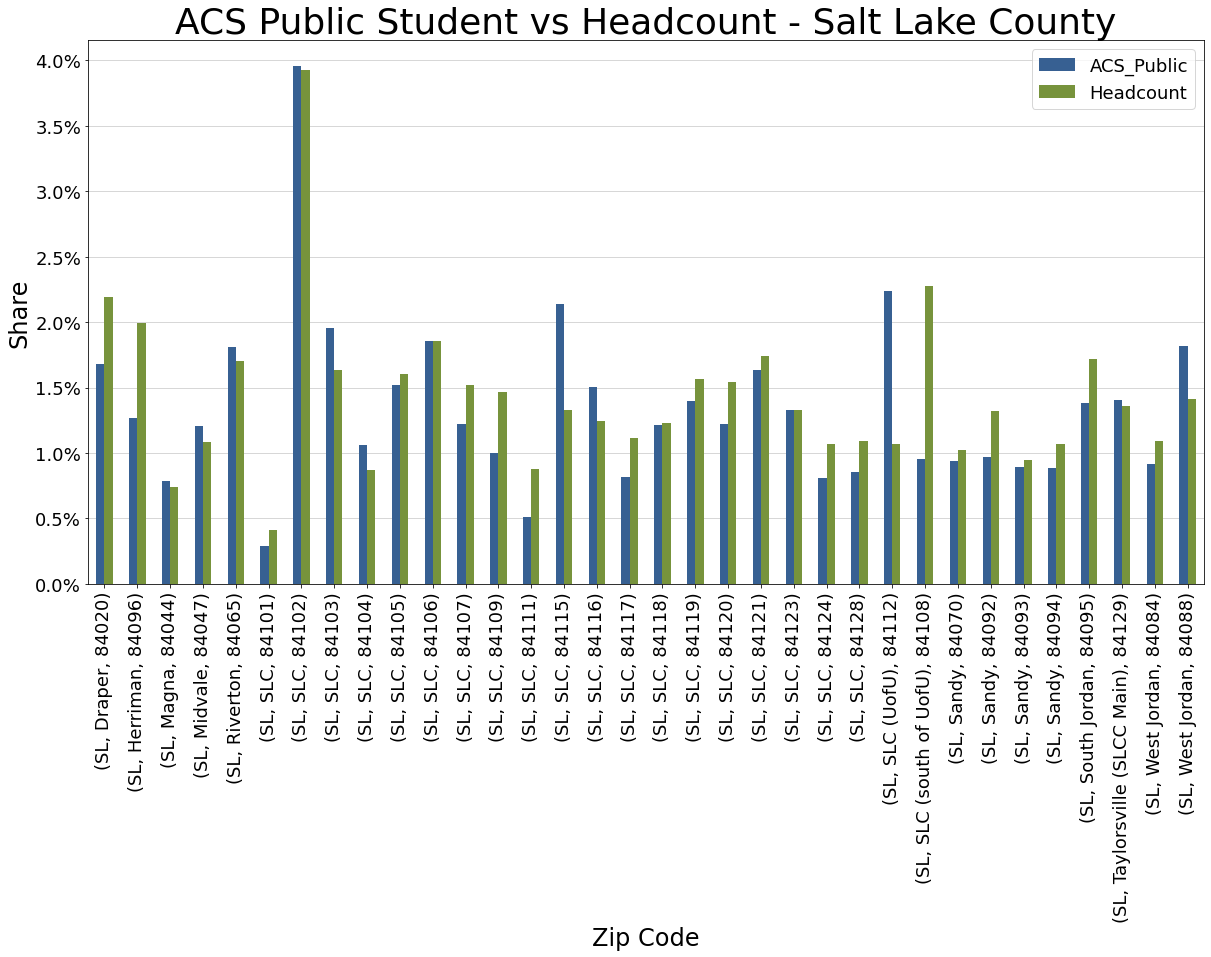

In [127]:
axr = df_chart.groupby(['County','City','zip5int']).agg({public + '_Share': [np.sum],'Headcount_Share': [np.sum]}).filter(like='SL', axis=0).plot.bar(figsize=(20,10), fontsize=18, color={"#376092", "#77933c"}, zorder=10)
axr.set_xlabel("Zip Code", fontsize=24)
axr.set_ylabel("Share", fontsize=24)
axr.set_title("ACS Public Student vs Headcount - Salt Lake County", fontsize=36)
axr.legend([public, "Headcount"], prop=dict(size=18))
axr.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)
axr.yaxis.set_major_formatter(mtick.PercentFormatter(100,1))

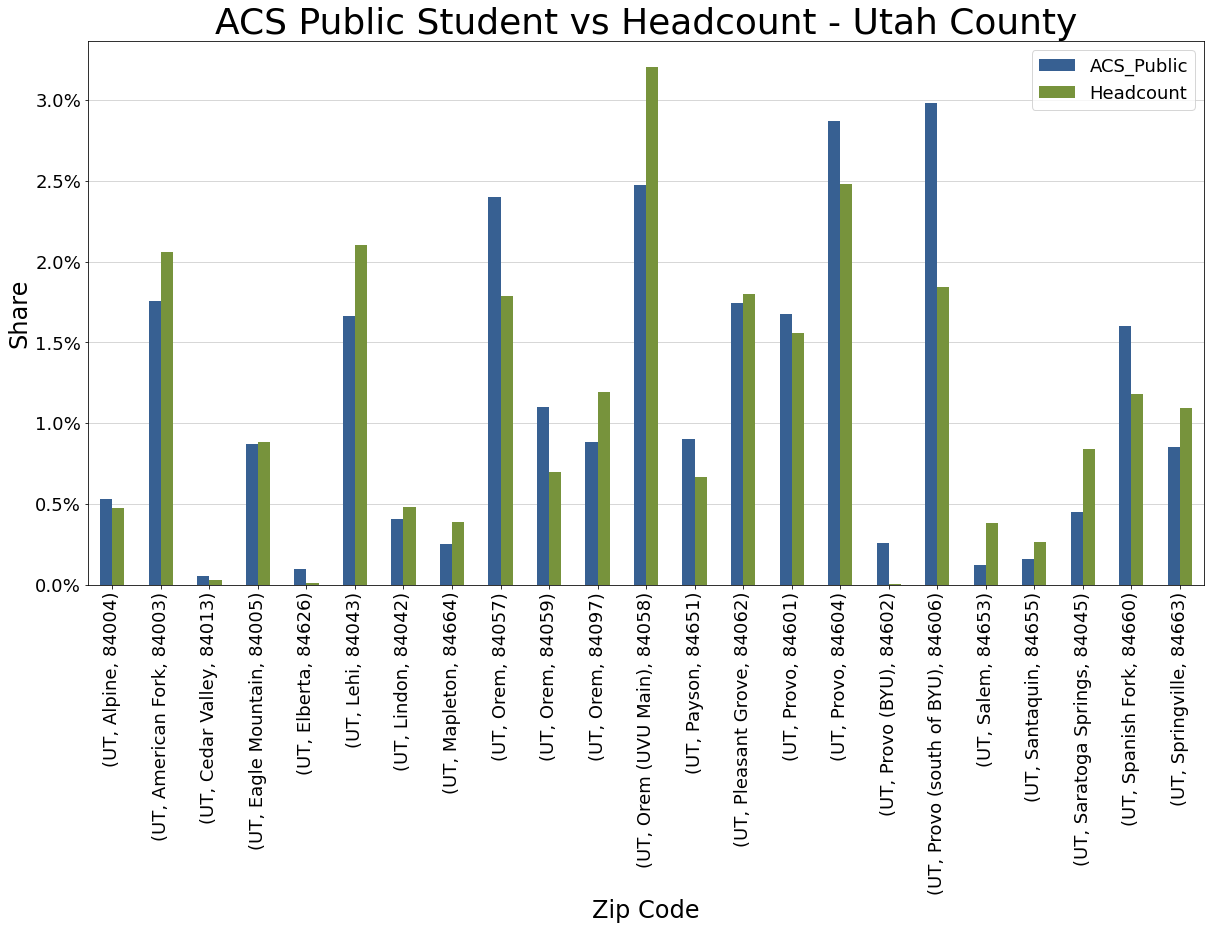

In [128]:
axr = df_chart.groupby(['County','City','zip5int']).agg({public + '_Share': [np.sum],'Headcount_Share': [np.sum]}).filter(like='UT', axis=0).plot.bar(figsize=(20,10), fontsize=18, color={"#376092", "#77933c"}, zorder=10)
axr.set_xlabel("Zip Code", fontsize=24)
axr.set_ylabel("Share", fontsize=24)
axr.set_title("ACS Public Student vs Headcount - Utah County", fontsize=36)
axr.legend([public, "Headcount"], prop=dict(size=18))
axr.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)
axr.yaxis.set_major_formatter(mtick.PercentFormatter(100,1))

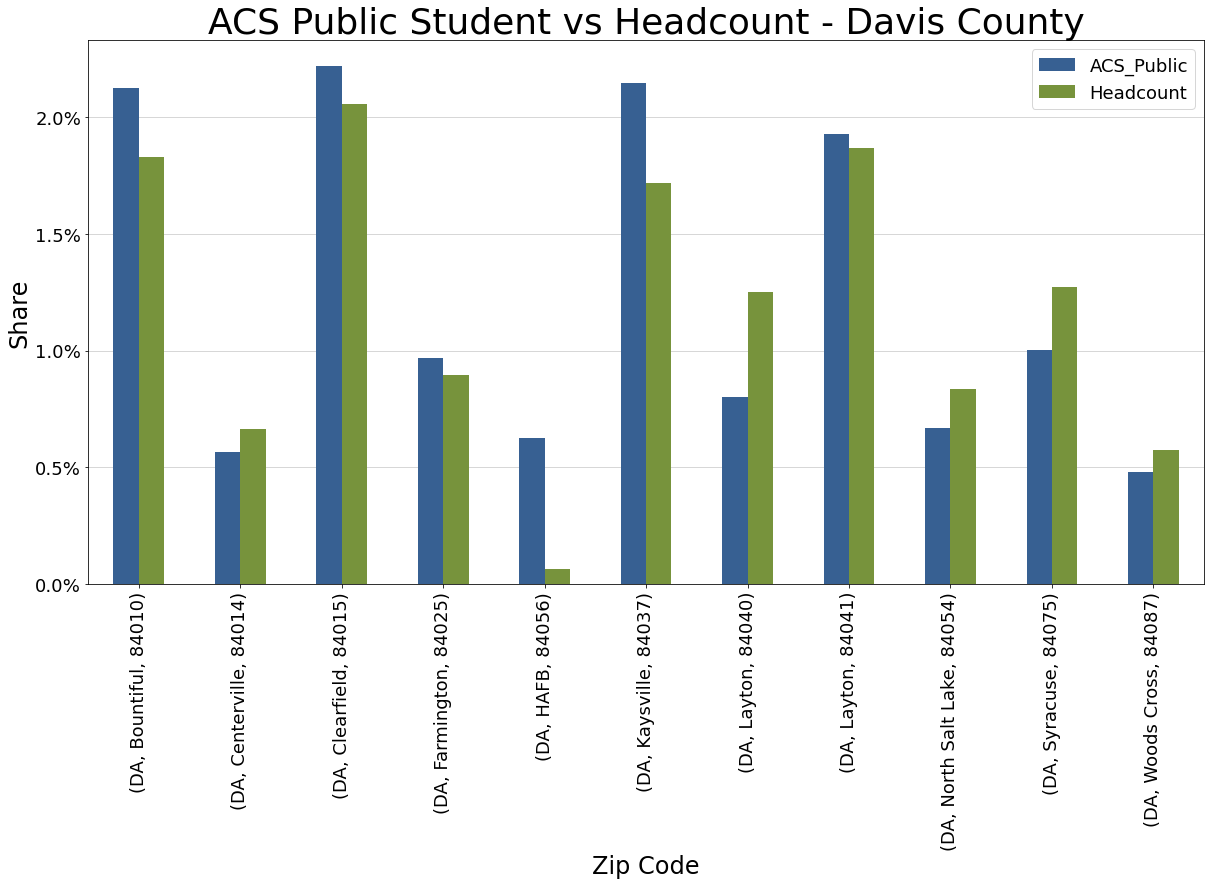

In [129]:
axr = df_chart.groupby(['County','City','zip5int']).agg({public + '_Share': [np.sum],'Headcount_Share': [np.sum]}).filter(like='DA', axis=0).plot.bar(figsize=(20,10), fontsize=18, color={"#376092", "#77933c"}, zorder=10)
axr.set_xlabel("Zip Code", fontsize=24)
axr.set_ylabel("Share", fontsize=24)
axr.set_title("ACS Public Student vs Headcount - Davis County", fontsize=36)
axr.legend([public, "Headcount"], prop=dict(size=18))
axr.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)
axr.yaxis.set_major_formatter(mtick.PercentFormatter(100,1))

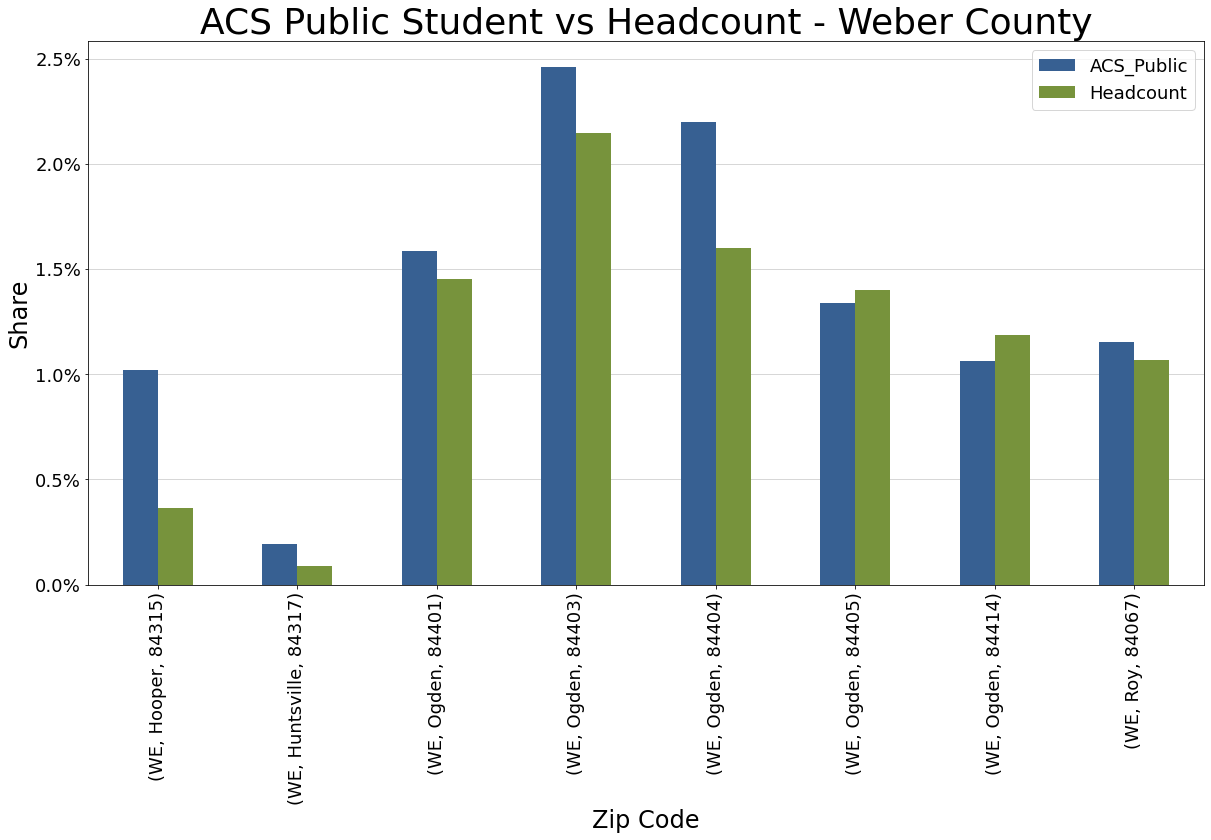

In [130]:
axr = df_chart.groupby(['County','City','zip5int']).agg({public + '_Share': [np.sum],'Headcount_Share': [np.sum]}).filter(like='WE', axis=0).plot.bar(figsize=(20,10), fontsize=18, color={"#376092", "#77933c"}, zorder=10)
axr.set_xlabel("Zip Code", fontsize=24)
axr.set_ylabel("Share", fontsize=24)
axr.set_title("ACS Public Student vs Headcount - Weber County", fontsize=36)
axr.legend([public, "Headcount"], prop=dict(size=18))
axr.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)
axr.yaxis.set_major_formatter(mtick.PercentFormatter(100,1))

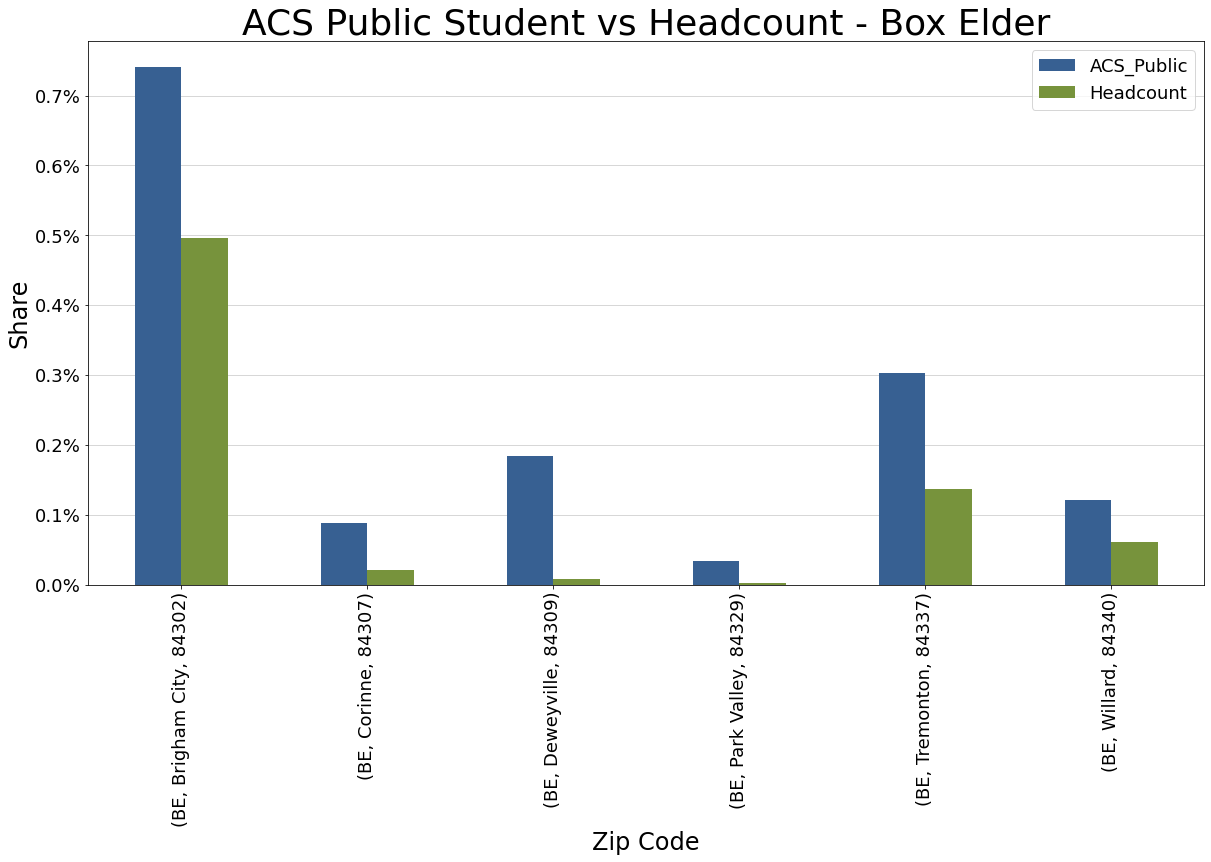

In [131]:
axr = df_chart.groupby(['County','City','zip5int']).agg({public + '_Share': [np.sum],'Headcount_Share': [np.sum]}).filter(like='BE', axis=0).plot.bar(figsize=(20,10), fontsize=18, color={"#376092", "#77933c"}, zorder=10)
axr.set_xlabel("Zip Code", fontsize=24)
axr.set_ylabel("Share", fontsize=24)
axr.set_title("ACS Public Student vs Headcount - Box Elder", fontsize=36)
axr.legend([public, "Headcount"], prop=dict(size=18))
axr.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)
axr.yaxis.set_major_formatter(mtick.PercentFormatter(100,1))

# Create Disaggregation from Zip Code to Tract

In [132]:
df_zip_college = df_acs_zip.copy()
df_zip_college.columns = ('zip5','ACS_Public_Zip','ACS_Private_Zip','ACS_Total_Zip','zip5int')
df_zip_college.head()

,zip5,ACS_Public_Zip,ACS_Private_Zip,ACS_Total_Zip,zip5int
0,84003,2378,683,3061,84003
1,84004,715,399,1114,84004
2,84005,1176,459,1635,84005
3,84009,1432,233,1665,84009
4,84010,2876,793,3669,84010


In [133]:
df_zip_college.sum()

zip5                     inf
ACS_Public_Zip      135595.0
ACS_Private_Zip      63323.0
ACS_Total_Zip       198918.0
zip5int            7156203.0
dtype: float64

In [134]:
sdf_tract_zipjoin

,GEOID,SHAPE,ACS_Public,ACS_Private,ACS_Total,x_lon,y_lat,index_right,FID,zip5,countynbr,name,symbol
0,49049001001,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",137,86,223,-111.681213,40.293478,53,53,84097,25,OREM,2
1,49049001002,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",172,115,287,-111.679244,40.286163,53,53,84097,25,OREM,2
2,49049001300,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",306,216,522,-111.677061,40.274199,53,53,84097,25,OREM,2
3,49049000710,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",141,105,246,-111.683160,40.330126,53,53,84097,25,OREM,2
4,49049000903,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",166,98,264,-111.674051,40.308444,53,53,84097,25,OREM,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,49049010600,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",131,25,156,-111.978262,39.972789,228,228,84626,25,ELBERTA,2
451,49049010106,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",210,28,238,-111.935276,40.326575,11,11,84045,25,SARATOGA SPRINGS,2
452,49049010109,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",398,186,584,-111.923697,40.385033,11,11,84045,25,SARATOGA SPRINGS,2
453,49011125103,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111...",392,96,488,-111.949761,41.127716,130,130,84056,6,HILL AFB,4


In [135]:
#find number of zip codes
sdf_tract_zipjoin.groupby(['zip5']).agg({'GEOID': [np.size]})

,GEOID
,size
zip5,
84003,9
84004,3
84005,3
84009,2
84010,10
...,...
84653,1
84655,3


In [136]:
#find number of tracts
sdf_tract_zipjoin.groupby(['zip5']).agg({'GEOID': [np.size]}).sum()

GEOID  size    455
dtype: int64

In [137]:
sdf_tract_zip_disagg = pd.merge(sdf_tract_zipjoin, df_zip_college, on='zip5', how='left')
sdf_tract_zip_disagg.head()

,GEOID,SHAPE,ACS_Public,ACS_Private,ACS_Total,x_lon,y_lat,index_right,FID,zip5,countynbr,name,symbol,ACS_Public_Zip,ACS_Private_Zip,ACS_Total_Zip,zip5int
0,49049001001,"{'spatialReference': {'wkid': 4326}, 'x': -111...",137,86,223,-111.681213,40.293478,53,53,84097,25,OREM,2,1195,757,1952,84097
1,49049001002,"{'spatialReference': {'wkid': 4326}, 'x': -111...",172,115,287,-111.679244,40.286163,53,53,84097,25,OREM,2,1195,757,1952,84097
2,49049001300,"{'spatialReference': {'wkid': 4326}, 'x': -111...",306,216,522,-111.677061,40.274199,53,53,84097,25,OREM,2,1195,757,1952,84097
3,49049000710,"{'spatialReference': {'wkid': 4326}, 'x': -111...",141,105,246,-111.683160,40.330126,53,53,84097,25,OREM,2,1195,757,1952,84097
4,49049000903,"{'spatialReference': {'wkid': 4326}, 'x': -111...",166,98,264,-111.674051,40.308444,53,53,84097,25,OREM,2,1195,757,1952,84097


In [138]:
sdf_tract_zip_disagg[public + '_ZipShare'] = sdf_tract_zip_disagg.apply(lambda row: sdf_tract_zip_disagg[public].iloc[row.name] / sdf_tract_zip_disagg[public+'_Zip'].iloc[row.name], axis = 1)
sdf_tract_zip_disagg[private + '_ZipShare'] = sdf_tract_zip_disagg.apply(lambda row: sdf_tract_zip_disagg[private].iloc[row.name] / sdf_tract_zip_disagg[private+'_Zip'].iloc[row.name], axis = 1)
sdf_tract_zip_disagg[total + '_ZipShare'] = sdf_tract_zip_disagg.apply(lambda row: sdf_tract_zip_disagg[total].iloc[row.name] / sdf_tract_zip_disagg[total+'_Zip'].iloc[row.name], axis = 1)

In [139]:
sdf_tract_zip_disagg

,GEOID,SHAPE,ACS_Public,ACS_Private,ACS_Total,x_lon,y_lat,index_right,FID,zip5,countynbr,name,symbol,ACS_Public_Zip,ACS_Private_Zip,ACS_Total_Zip,zip5int,ACS_Public_ZipShare,ACS_Private_ZipShare,ACS_Total_ZipShare
0,49049001001,"{'spatialReference': {'wkid': 4326}, 'x': -111...",137,86,223,-111.681213,40.293478,53,53,84097,25,OREM,2,1195,757,1952,84097,0.114644,0.113606,0.114242
1,49049001002,"{'spatialReference': {'wkid': 4326}, 'x': -111...",172,115,287,-111.679244,40.286163,53,53,84097,25,OREM,2,1195,757,1952,84097,0.143933,0.151915,0.147029
2,49049001300,"{'spatialReference': {'wkid': 4326}, 'x': -111...",306,216,522,-111.677061,40.274199,53,53,84097,25,OREM,2,1195,757,1952,84097,0.256067,0.285337,0.267418
3,49049000710,"{'spatialReference': {'wkid': 4326}, 'x': -111...",141,105,246,-111.683160,40.330126,53,53,84097,25,OREM,2,1195,757,1952,84097,0.117992,0.138705,0.126025
4,49049000903,"{'spatialReference': {'wkid': 4326}, 'x': -111...",166,98,264,-111.674051,40.308444,53,53,84097,25,OREM,2,1195,757,1952,84097,0.138912,0.129458,0.135246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,49049010600,"{'spatialReference': {'wkid': 4326}, 'x': -111...",131,25,156,-111.978262,39.972789,228,228,84626,25,ELBERTA,2,131,25,156,84626,1.000000,1.000000,1.000000
451,49049010106,"{'spatialReference': {'wkid': 4326}, 'x': -111...",210,28,238,-111.935276,40.326575,11,11,84045,25,SARATOGA SPRINGS,2,608,214,822,84045,0.345395,0.130841,0.289538
452,49049010109,"{'spatialReference': {'wkid': 4326}, 'x': -111...",398,186,584,-111.923697,40.385033,11,11,84045,25,SARATOGA SPRINGS,2,608,214,822,84045,0.654605,0.869159,0.710462
453,49011125103,"{'spatialReference': {'wkid': 4326}, 'x': -111...",392,96,488,-111.949761,41.127716,130,130,84056,6,HILL AFB,4,846,210,1056,84056,0.463357,0.457143,0.462121


In [140]:
sdf_tract_zip_check = sdf_tract_zip_disagg.groupby(['zip5int']).agg({public + '_ZipShare': [np.size, np.sum], private + '_ZipShare': [np.size, np.sum], total + '_ZipShare': [np.size, np.sum]})
sdf_tract_zip_check.head()

ACS_Public_ZipShare      ACS_Private_ZipShare      ACS_Total_ZipShare  \
                       size  sum                 size  sum               size   
zip5int                                                                         
84003                   9.0  1.0                  9.0  1.0                9.0   
84004                   3.0  1.0                  3.0  1.0                3.0   
84005                   3.0  1.0                  3.0  1.0                3.0   
84009                   2.0  1.0                  2.0  1.0                2.0   
84010                  10.0  1.0                 10.0  1.0               10.0   

              
         sum  
zip5int       
84003    1.0  
84004    1.0  
84005    1.0  
84009    1.0  
84010    1.0

In [141]:
sdf_tract_zip_check.sum()

ACS_Public_ZipShare   size    455.0
                      sum      85.0
ACS_Private_ZipShare  size    455.0
                      sum      85.0
ACS_Total_ZipShare    size    455.0
                      sum      85.0
dtype: float64

In [142]:
df_HC

,Institution,Site,Academic_Year,Term,ZIP_Code,Full_or_Part_Time,Headcount
0,SLCC,Draper,2020,2,84020,Part-Time,2
1,SLCC,Draper,2020,2,84070,Part-Time,1
2,SLCC,Draper,2020,2,84104,Part-Time,1
3,SLCC,Draper,2020,2,84107,Part-Time,1
4,SLCC,Draper,2020,2,84124,Part-Time,1
...,...,...,...,...,...,...,...
2967,WSU,WSU West Center,2020,2,84403,Part-Time,22
2968,WSU,WSU West Center,2020,2,84404,Part-Time,16
2969,WSU,WSU West Center,2020,2,84405,Part-Time,19
2970,WSU,WSU West Center,2020,2,84408,Part-Time,1


In [143]:
sdf_HC_tract = pd.merge(sdf_tract_zip_disagg, df_HC, left_on="zip5int", right_on="ZIP_Code", how="inner")
sdf_HC_tract = sdf_HC_tract.rename(columns={"Headcount":"Headcount_Zip"})
sdf_HC_tract

,GEOID,SHAPE,ACS_Public,ACS_Private,ACS_Total,x_lon,y_lat,index_right,FID,zip5,...,ACS_Public_ZipShare,ACS_Private_ZipShare,ACS_Total_ZipShare,Institution,Site,Academic_Year,Term,ZIP_Code,Full_or_Part_Time,Headcount_Zip
0,49049001001,"{'spatialReference': {'wkid': 4326}, 'x': -111...",137,86,223,-111.681213,40.293478,53,53,84097,...,0.114644,0.113606,0.114242,SLCC,Main Campus,2020,2,84097,Full-Time,2
1,49049001001,"{'spatialReference': {'wkid': 4326}, 'x': -111...",137,86,223,-111.681213,40.293478,53,53,84097,...,0.114644,0.113606,0.114242,SLCC,Main Campus,2020,2,84097,Part-Time,19
2,49049001001,"{'spatialReference': {'wkid': 4326}, 'x': -111...",137,86,223,-111.681213,40.293478,53,53,84097,...,0.114644,0.113606,0.114242,SLCC,SLCC Jordan Campus,2020,2,84097,Full-Time,2
3,49049001001,"{'spatialReference': {'wkid': 4326}, 'x': -111...",137,86,223,-111.681213,40.293478,53,53,84097,...,0.114644,0.113606,0.114242,SLCC,SLCC Jordan Campus,2020,2,84097,Part-Time,12
4,49049001001,"{'spatialReference': {'wkid': 4326}, 'x': -111...",137,86,223,-111.681213,40.293478,53,53,84097,...,0.114644,0.113606,0.114242,SLCC,SLCC Larry H. Miller Campus,2020,2,84097,Part-Time,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11852,49011125200,"{'spatialReference': {'wkid': 4326}, 'x': -111...",454,114,568,-111.990379,41.126573,130,130,84056,...,0.536643,0.542857,0.537879,WSU,Main Campus,2020,2,84056,Part-Time,16
11853,49011125200,"{'spatialReference': {'wkid': 4326}, 'x': -111...",454,114,568,-111.990379,41.126573,130,130,84056,...,0.536643,0.542857,0.537879,WSU,WSU Davis Center,2020,2,84056,Full-Time,1
11854,49011125200,"{'spatialReference': {'wkid': 4326}, 'x': -111...",454,114,568,-111.990379,41.126573,130,130,84056,...,0.536643,0.542857,0.537879,WSU,WSU Davis Center,2020,2,84056,Part-Time,13
11855,49011125200,"{'spatialReference': {'wkid': 4326}, 'x': -111...",454,114,568,-111.990379,41.126573,130,130,84056,...,0.536643,0.542857,0.537879,WSU,WSU Farmington Station,2020,2,84056,Part-Time,2


In [144]:
#right join to check unmatched data
sdf_HC_tract_right = pd.merge(sdf_tract_zip_disagg, df_HC_zip, left_on="zip5int", right_on="ZIP_Code", how="right")
sdf_HC_tract_right = sdf_HC_tract_right.rename(columns={"Headcount":"Headcount_Zip"})
sdf_HC_tract_right

,GEOID,SHAPE,ACS_Public,ACS_Private,ACS_Total,x_lon,y_lat,index_right,FID,zip5,...,symbol,ACS_Public_Zip,ACS_Private_Zip,ACS_Total_Zip,zip5int,ACS_Public_ZipShare,ACS_Private_ZipShare,ACS_Total_ZipShare,ZIP_Code,Headcount_Zip
0,49049001001,"{'spatialReference': {'wkid': 4326}, 'x': -111...",137.0,86.0,223.0,-111.681213,40.293478,53.0,53.0,84097,...,2.0,1195.0,757.0,1952.0,84097.0,0.114644,0.113606,0.114242,84097,1068
1,49049001002,"{'spatialReference': {'wkid': 4326}, 'x': -111...",172.0,115.0,287.0,-111.679244,40.286163,53.0,53.0,84097,...,2.0,1195.0,757.0,1952.0,84097.0,0.143933,0.151915,0.147029,84097,1068
2,49049001300,"{'spatialReference': {'wkid': 4326}, 'x': -111...",306.0,216.0,522.0,-111.677061,40.274199,53.0,53.0,84097,...,2.0,1195.0,757.0,1952.0,84097.0,0.256067,0.285337,0.267418,84097,1068
3,49049000710,"{'spatialReference': {'wkid': 4326}, 'x': -111...",141.0,105.0,246.0,-111.683160,40.330126,53.0,53.0,84097,...,2.0,1195.0,757.0,1952.0,84097.0,0.117992,0.138705,0.126025,84097,1068
4,49049000903,"{'spatialReference': {'wkid': 4326}, 'x': -111...",166.0,98.0,264.0,-111.674051,40.308444,53.0,53.0,84097,...,2.0,1195.0,757.0,1952.0,84097.0,0.138912,0.129458,0.135246,84097,1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84783,1
647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84784,2
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84790,153
649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84791,1


In [145]:
#check NaN values after join, sort by Headcount. Investigatings these further shows these are for students living outside of WFRC/MAG model area
sdf_check = sdf_HC_tract_right[['GEOID','ZIP_Code','Headcount_Zip']].copy()
sdf_check[sdf_check.isna().any(axis=1)].sort_values(by='Headcount_Zip', ascending=False).head(15)

,GEOID,ZIP_Code,Headcount_Zip
489,NaN,84074,789
500,NaN,84098,607
468,NaN,84032,406
476,NaN,84050,321
502,NaN,84113,212
531,NaN,84321,198
481,NaN,84060,181
466,NaN,84029,170
522,NaN,84310,169
648,NaN,84790,153


In [146]:
sdf_check[sdf_check.isna().any(axis=1)].sum()

GEOID                   0.0
ZIP_Code         16630130.0
Headcount_Zip        5592.0
dtype: float64

In [147]:
sdf_HC_tract.groupby(['zip5int','Headcount_Zip']).agg({public + '_ZipShare': [np.size, np.sum], private + '_ZipShare': [np.size, np.sum], total + '_ZipShare': [np.size, np.sum]})

ACS_Public_ZipShare       ACS_Private_ZipShare        \
                                     size   sum                 size   sum   
zip5int Headcount_Zip                                                        
84003   1                            90.0  10.0                 90.0  10.0   
        2                            18.0   2.0                 18.0   2.0   
        3                            27.0   3.0                 27.0   3.0   
        4                            18.0   2.0                 18.0   2.0   
        5                             9.0   1.0                  9.0   1.0   
...                                   ...   ...                  ...   ...   
84664   1                            12.0   6.0                 12.0   6.0   
        2                             6.0   3.0                  6.0   3.0   
        14                            4.0   2.0                  4.0   2.0   
        136                           2.0   1.0                  2.0   1.0   
        172                           2.0   1.0                  2.0   1.0   

                      ACS_Total_ZipShare        
                                    size   sum  
zip5int Headcount_Zip                           
84003   1                           90.0  10.0  
        2                           18.0   2.0  
        3                           27.0   3.0  
        4                           18.0   2.0  
        5                            9.0   1.0  
...                                  ...   ...  
84664   1                           12.0   6.0  
        2                            6.0   3.0  
        14                           4.0   2.0  
        136                          2.0   1.0  
        172                          2.0   1.0  

[1177 rows x 6 columns]

In [148]:
sdf_HC_tract.groupby(['zip5int','Headcount_Zip'], as_index=False).agg({public + '_ZipShare': [np.size, np.sum], private + '_ZipShare': [np.size, np.sum], total + '_ZipShare': [np.size, np.sum]}).sum()

zip5int                       99041238.0
Headcount_Zip                    86558.0
ACS_Public_ZipShare   size       11857.0
                      sum         1965.0
ACS_Private_ZipShare  size       11857.0
                      sum         1965.0
ACS_Total_ZipShare    size       11857.0
                      sum         1965.0
dtype: float64

In [149]:
sdf_HC_tract['Headcount_Public_Tract'] = sdf_HC_tract.apply(lambda row: int(sdf_HC_tract['Headcount_Zip'].iloc[row.name] * sdf_HC_tract[public+'_ZipShare'].iloc[row.name]), axis = 1)
sdf_HC_tract[[public, 'Headcount_Public_Tract']]

,ACS_Public,Headcount_Public_Tract
0,137,0
1,137,2
2,137,0
3,137,1
4,137,0
...,...,...
11852,454,8
11853,454,0
11854,454,6
11855,454,1


In [150]:
#Add up public headcount
sdf_HC_tract[[public, 'Headcount_Public_Tract']].sum()

ACS_Public                3502837
Headcount_Public_Tract      84851
dtype: int64

# Tract to TAZ Dissagregation, Scoring of TAZs (using parcel data from REMM)

In [151]:
df_buildings = pd.read_csv(buildings_filename, usecols=['parcel_id','general_type','residential_units'])

#only include residential general_type
df_buildings = df_buildings[(df_buildings.general_type == 'SF Residential') | (df_buildings.general_type == 'MF Residential')]
df_buildings

,residential_units,parcel_id,general_type
0,1.0,487357,SF Residential
1,1.0,468869,SF Residential
2,1.0,544735,MF Residential
3,1.0,14751,SF Residential
4,1.0,14619,SF Residential
...,...,...,...
676235,4.0,591505,MF Residential
676236,34.0,646852,SF Residential
676237,1.0,572186,MF Residential
676238,5.0,764670,SF Residential


In [152]:
df_parcel_taz = pd.read_csv(parcel_taz_filename, usecols=['parcel_id','TAZID'])
df_parcel_taz

,parcel_id,TAZID
0,671124.0,2246
1,588354.0,2246
2,664267.0,2246
3,745122.0,2246
4,670759.0,2246
...,...,...
841701,739015.0,1830
841702,739015.0,1830
841703,739015.0,1830
841704,739015.0,1830


In [153]:
#join
df_building_taz = pd.merge(df_buildings, df_parcel_taz, on="parcel_id", how="inner")
df_building_taz

,residential_units,parcel_id,general_type,TAZID
0,1.0,487357,SF Residential,294
1,1.0,468869,SF Residential,217
2,1.0,544735,MF Residential,312
3,1.0,14751,SF Residential,1032
4,1.0,14619,SF Residential,1032
...,...,...,...,...
629450,2.0,666800,SF Residential,2337
629451,4.0,591505,MF Residential,2360
629452,34.0,646852,SF Residential,1865
629453,1.0,572186,MF Residential,2398


In [154]:
df_taz_resunits = df_building_taz.groupby(['TAZID','general_type'], as_index=False).agg({'residential_units': [np.size, np.sum]})

#collapse multi-level
df_taz_resunits.columns = df_taz_resunits.columns.get_level_values(0)

#rename columns
df_taz_resunits.columns = ['TAZID', 'general_type', 'Parcels', 'Units']

df_taz_resunits

,TAZID,general_type,Parcels,Units
0,141,MF Residential,8.0,13.0
1,141,SF Residential,126.0,123.0
2,142,MF Residential,1.0,1.0
3,142,SF Residential,30.0,30.0
4,143,SF Residential,50.0,52.0
...,...,...,...,...
3819,2868,MF Residential,5.0,6.0
3820,2868,SF Residential,73.0,77.0
3821,2869,SF Residential,12.0,12.0
3822,2870,SF Residential,6.0,6.0


In [155]:
#pivot with rows of TAZID, columns of general_type, and values
df_taz_resunits_pvt = df_taz_resunits.pivot(index='TAZID', columns='general_type')['Units']

#reset index column to remove general_type name
df_taz_resunits_pvt.reset_index(level=0, inplace=True)
df_taz_resunits_pvt.columns= ['TAZID','MF','SF']

#replace NaN with zeros
df_taz_resunits_pvt["MF"] = df_taz_resunits_pvt["MF"].fillna(0)
df_taz_resunits_pvt["SF"] = df_taz_resunits_pvt["SF"].fillna(0)

df_taz_resunits_pvt

,TAZID,MF,SF
0,141,13.0,123.0
1,142,1.0,30.0
2,143,0.0,52.0
3,144,0.0,31.0
4,145,2.0,172.0
...,...,...,...
2291,2867,24.0,160.0
2292,2868,6.0,77.0
2293,2869,0.0,12.0
2294,2870,0.0,6.0


In [156]:
df_taz_resunits_pvt.sum()

TAZID    3435772.0
MF        265953.0
SF        565158.0
dtype: float64

In [170]:
#create score for distributing from census tract to TAZ
df_taz_resunits_scores = df_taz_resunits_pvt.copy()

df_taz_resunits_scores['score01'] =  df_taz_resunits_pvt.apply(lambda row: row.MF*1 + row.SF*1, axis = 1)
df_taz_resunits_scores['score05'] =  df_taz_resunits_pvt.apply(lambda row: row.MF*5 + row.SF*1, axis = 1)
df_taz_resunits_scores['score10'] =  df_taz_resunits_pvt.apply(lambda row: row.MF*10 + row.SF*1, axis = 1)

df_taz_resunits_scores

,TAZID,MF,SF,score01,score05,score10
0,141,13.0,123.0,136.0,188.0,253.0
1,142,1.0,30.0,31.0,35.0,40.0
2,143,0.0,52.0,52.0,52.0,52.0
3,144,0.0,31.0,31.0,31.0,31.0
4,145,2.0,172.0,174.0,182.0,192.0
...,...,...,...,...,...,...
2291,2867,24.0,160.0,184.0,280.0,400.0
2292,2868,6.0,77.0,83.0,107.0,137.0
2293,2869,0.0,12.0,12.0,12.0,12.0
2294,2870,0.0,6.0,6.0,6.0,6.0


In [171]:
csv_taz_tract = os.path.join(data_folder, r"TAZ_CensusTract.csv")

#csv has two header rows
df_taz_tract = pd.read_csv(csv_taz_tract, usecols=['TAZID','GEOID'])

df_taz_tract

,TAZID,GEOID
0,460,49011125401
1,461,49011125401
2,425,49011125401
3,427,49011125401
4,457,49011125401
...,...,...
2876,898,49035113511
2877,1422,49035113527
2878,940,49035113532
2879,1439,49035112907


In [172]:
df_taz_resunits_scores_geoid = pd.merge(df_taz_resunits_scores,df_taz_tract,on='TAZID',how='inner')
df_taz_resunits_scores_geoid

,TAZID,MF,SF,score01,score05,score10,GEOID
0,141,13.0,123.0,136.0,188.0,253.0,49057210403
1,142,1.0,30.0,31.0,35.0,40.0,49057210403
2,143,0.0,52.0,52.0,52.0,52.0,49057210403
3,144,0.0,31.0,31.0,31.0,31.0,49057210403
4,145,2.0,172.0,174.0,182.0,192.0,49057210403
...,...,...,...,...,...,...,...
2291,2867,24.0,160.0,184.0,280.0,400.0,49049010600
2292,2868,6.0,77.0,83.0,107.0,137.0,49049010600
2293,2869,0.0,12.0,12.0,12.0,12.0,49049010600
2294,2870,0.0,6.0,6.0,6.0,6.0,49049010113


In [209]:
df_taz_resunits_scores_geoid_sums = df_taz_resunits_scores_geoid.groupby(['GEOID'], as_index=False).agg({'SF': [np.size, np.sum], 'MF': [np.sum], 'score01': [np.sum], 'score05': [np.sum], 'score10': [np.sum]})


#collapse multi-level
df_taz_resunits_scores_geoid_sums.columns = df_taz_resunits_scores_geoid_sums.columns.get_level_values(0)

#rename columns
df_taz_resunits_scores_geoid_sums.columns = ['GEOID', 'tractTAZs', 'tractSF', 'tractMF', 'tractScore01', 'tractScore05', 'tractScore10']


df_taz_resunits_scores_geoid_sums

,GEOID,tractTAZs,tractSF,tractMF,tractScore01,tractScore05,tractScore10
0,49011125102,3.0,1488.0,128.0,1616.0,2128.0,2768.0
1,49011125103,4.0,1392.0,509.0,1901.0,3937.0,6482.0
2,49011125104,4.0,1692.0,139.0,1831.0,2387.0,3082.0
3,49011125200,1.0,61.0,0.0,61.0,61.0,61.0
4,49011125301,4.0,1605.0,666.0,2271.0,4935.0,8265.0
...,...,...,...,...,...,...,...
436,49057210900,5.0,2593.0,433.0,3026.0,4758.0,6923.0
437,49057211000,2.0,1103.0,15.0,1118.0,1178.0,1253.0
438,49057211100,5.0,1439.0,611.0,2050.0,4494.0,7549.0
439,49057211201,3.0,1448.0,680.0,2128.0,4848.0,8248.0


In [211]:
df_taz_resunits_scores_geoid_sums.sum()

GEOID           2.162604e+13
tractTAZs       2.296000e+03
tractSF         5.651580e+05
tractMF         2.659530e+05
tractScore01    8.311110e+05
tractScore05    1.894923e+06
tractScore10    3.224688e+06
dtype: float64

In [223]:
df_taz_resunits_scores_geoid_withsums = pd.merge(df_taz_resunits_scores_geoid, df_taz_resunits_scores_geoid_sums, on='GEOID', how='left')
df_taz_resunits_scores_geoid_withsums

,TAZID,MF,SF,score01,score05,score10,GEOID,tractTAZs,tractSF,tractMF,tractScore01,tractScore05,tractScore10
0,141,13.0,123.0,136.0,188.0,253.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0
1,142,1.0,30.0,31.0,35.0,40.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0
2,143,0.0,52.0,52.0,52.0,52.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0
3,144,0.0,31.0,31.0,31.0,31.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0
4,145,2.0,172.0,174.0,182.0,192.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,2867,24.0,160.0,184.0,280.0,400.0,49049010600,27.0,1241.0,102.0,1343.0,1751.0,2261.0
2292,2868,6.0,77.0,83.0,107.0,137.0,49049010600,27.0,1241.0,102.0,1343.0,1751.0,2261.0
2293,2869,0.0,12.0,12.0,12.0,12.0,49049010600,27.0,1241.0,102.0,1343.0,1751.0,2261.0
2294,2870,0.0,6.0,6.0,6.0,6.0,49049010113,14.0,2180.0,31.0,2211.0,2335.0,2490.0


In [225]:
df_taz_resunits_scores_geoid_withsums['score01_tractshare'] =  df_taz_resunits_scores_geoid_withsums.apply(lambda row: row.score01 / row.tractScore01, axis = 1)
df_taz_resunits_scores_geoid_withsums['score05_tractshare'] =  df_taz_resunits_scores_geoid_withsums.apply(lambda row: row.score05 / row.tractScore05, axis = 1)
df_taz_resunits_scores_geoid_withsums['score10_tractshare'] =  df_taz_resunits_scores_geoid_withsums.apply(lambda row: row.score10 / row.tractScore10, axis = 1)
df_taz_resunits_scores_geoid_withsums

,TAZID,MF,SF,score01,score05,score10,GEOID,tractTAZs,tractSF,tractMF,tractScore01,tractScore05,tractScore10,score01_tractshare,score05_tractshare,score10_tractshare
0,141,13.0,123.0,136.0,188.0,253.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0,0.040130,0.034938,0.032143
1,142,1.0,30.0,31.0,35.0,40.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0,0.009147,0.006504,0.005082
2,143,0.0,52.0,52.0,52.0,52.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0,0.015344,0.009664,0.006607
3,144,0.0,31.0,31.0,31.0,31.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0,0.009147,0.005761,0.003939
4,145,2.0,172.0,174.0,182.0,192.0,49057210403,22.0,2891.0,498.0,3389.0,5381.0,7871.0,0.051343,0.033823,0.024393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,2867,24.0,160.0,184.0,280.0,400.0,49049010600,27.0,1241.0,102.0,1343.0,1751.0,2261.0,0.137007,0.159909,0.176913
2292,2868,6.0,77.0,83.0,107.0,137.0,49049010600,27.0,1241.0,102.0,1343.0,1751.0,2261.0,0.061802,0.061108,0.060593
2293,2869,0.0,12.0,12.0,12.0,12.0,49049010600,27.0,1241.0,102.0,1343.0,1751.0,2261.0,0.008935,0.006853,0.005307
2294,2870,0.0,6.0,6.0,6.0,6.0,49049010113,14.0,2180.0,31.0,2211.0,2335.0,2490.0,0.002714,0.002570,0.002410


In [226]:
sdf_taz = pd.DataFrame.spatial.from_featureclass(taz_filename)
sdf_taz

,FID,TAZID,SORT,CO_TAZID,SUBAREAID,EXTERNAL,ACRES,DEVACRES,X,Y,...,DLRG_NAME,DISTMED,DMED_NAME,DISTSML,DSML_NAME,AIRSAGE,WF_AIRSAGE,SLC,NAAPM25,SHAPE
0,0,460,1,110460,1,0,322.29,322.29,409807.97148,4.551224e+06,...,North Davis,11,Clinton-W.Pt-Clearfield,98,Clinton-W.Pt-Clearfield,1106,13,2,NonAttnmnt|11|WFRC,"{""rings"": [[[409006.358836148, 4551638.5268631..."
1,1,461,2,110461,1,0,316.91,316.91,409818.05584,4.552025e+06,...,North Davis,11,Clinton-W.Pt-Clearfield,98,Clinton-W.Pt-Clearfield,1106,13,2,NonAttnmnt|11|WFRC,"{""rings"": [[[410620.28939738194, 4551617.45141..."
2,2,656,3,350656,1,0,828.83,701.91,407896.91458,4.518164e+06,...,North-west SL,17,NW Quad-International,155,NW Quad-International,3518,32,1,NonAttnmnt|35|WFRC,"{""rings"": [[[408728.6159094579, 4519566.605985..."
3,3,657,4,350657,1,0,531.35,531.28,409430.46088,4.518727e+06,...,North-west SL,17,NW Quad-International,155,NW Quad-International,3518,32,1,NonAttnmnt|35|WFRC,"{""rings"": [[[408712.0078618436, 4517726.402942..."
4,4,2696,5,492696,1,0,575.28,574.81,435443.25244,4.435982e+06,...,Southwest,45,Payson-Salem,550,Payson-Salem,4907,43,2,NonAttnmnt|49|MAG,"{""rings"": [[[436219.45121278096, 4436668.96657..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,2876,2307,2877,492307,1,0,163.96,163.96,442094.43254,4.463009e+06,...,Central,41,Orem-Vineyard,508,Orem-Vineyard,4904,40,2,NonAttnmnt|49|MAG,"{""rings"": [[[441685.71000000136, 4463418.93999..."
2877,2877,692,2878,350692,1,0,413.00,348.59,405441.29072,4.506191e+06,...,North-west SL,19,MVC-Magna-ATK,163,MVC-Magna-ATK,3519,33,2,NonAttnmnt|35|WFRC,"{""rings"": [[[406311.6023608913, 4505925.350275..."
2878,2878,697,2879,350697,1,0,290.96,290.96,407021.63812,4.506072e+06,...,North-west SL,19,MVC-Magna-ATK,164,MVC-Magna-ATK,3519,33,2,NonAttnmnt|35|WFRC,"{""rings"": [[[406289.42766158096, 4506464.54348..."
2879,2879,698,2880,350698,1,0,161.32,161.32,407310.52727,4.505313e+06,...,North-west SL,19,MVC-Magna-ATK,164,MVC-Magna-ATK,3519,33,2,NonAttnmnt|35|WFRC,"{""rings"": [[[407750.5751155648, 4505187.891955..."


In [227]:
sdf_taz_geoidscores = pd.merge(sdf_taz,df_taz_resunits_scores_geoid_withsums,on='TAZID',how='left')
sdf_taz_geoidscores

,FID,TAZID,SORT,CO_TAZID,SUBAREAID,EXTERNAL,ACRES,DEVACRES,X,Y,...,GEOID,tractTAZs,tractSF,tractMF,tractScore01,tractScore05,tractScore10,score01_tractshare,score05_tractshare,score10_tractshare
0,0,460,1,110460,1,0,322.29,322.29,409807.97148,4.551224e+06,...,4.901113e+10,10.0,3512.0,1039.0,4551.0,8707.0,13902.0,0.029664,0.038015,0.041433
1,1,461,2,110461,1,0,316.91,316.91,409818.05584,4.552025e+06,...,4.901113e+10,10.0,3512.0,1039.0,4551.0,8707.0,13902.0,0.125467,0.237855,0.283844
2,2,656,3,350656,1,0,828.83,701.91,407896.91458,4.518164e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,657,4,350657,1,0,531.35,531.28,409430.46088,4.518727e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2696,5,492696,1,0,575.28,574.81,435443.25244,4.435982e+06,...,4.904901e+10,44.0,773.0,378.0,1151.0,2663.0,4553.0,0.011295,0.004882,0.002855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,2876,2307,2877,492307,1,0,163.96,163.96,442094.43254,4.463009e+06,...,4.904900e+10,3.0,986.0,686.0,1672.0,4416.0,7846.0,0.205742,0.104167,0.077109
2877,2877,692,2878,350692,1,0,413.00,348.59,405441.29072,4.506191e+06,...,4.903511e+10,8.0,2086.0,725.0,2811.0,5711.0,9336.0,0.000356,0.000175,0.000107
2878,2878,697,2879,350697,1,0,290.96,290.96,407021.63812,4.506072e+06,...,4.903511e+10,8.0,2086.0,725.0,2811.0,5711.0,9336.0,0.327641,0.205393,0.159383
2879,2879,698,2880,350698,1,0,161.32,161.32,407310.52727,4.505313e+06,...,4.903511e+10,8.0,2086.0,725.0,2811.0,5711.0,9336.0,0.262540,0.335143,0.362468


In [228]:
#create map1 with zoom set to Salt Lake (any city or place name can be used)
map_taz_geoidscores01 = gis.map('Salt Lake')

#add tract sdf
sdf_taz_geoidscores.spatial.plot(map_widget = map_taz_geoidscores01,
                  renderer_type='c', # specify the classes renderer using its notation 'c'
                  method='esriClassifyNaturalBreaks',  # classification algorithm
                  class_count=5,  # choose the number of classes            
                  col='score01',  # numeric column to classify
                  cmap='Blues',  # color map to pick colors from for each class
                  alpha=0.7  # specify opacity
                  )

map_taz_geoidscores01.layout.height='600px'
map_taz_geoidscores01.legend = True

#add map title
display(Markdown('<h1><center>MF/SF Scores (MFx1)</center></h1>'))

#display the map
map_taz_geoidscores01

<h1><center>MF/SF Scores (MFx1)</center></h1>

MapView(layout=Layout(height='600px', width='100%'), legend=True)

In [203]:
#create map1 with zoom set to Salt Lake (any city or place name can be used)
map_taz_geoidscores05 = gis.map('Salt Lake')

#add tract sdf
sdf_taz_geoidscores.spatial.plot(map_widget = map_taz_geoidscores05,
                  renderer_type='c', # specify the classes renderer using its notation 'c'
                  method='esriClassifyNaturalBreaks',  # classification algorithm
                  class_count=5,  # choose the number of classes            
                  col='score05',  # numeric column to classify
                  cmap='Blues',  # color map to pick colors from for each class
                  alpha=0.7  # specify opacity
                  )

map_taz_geoidscores05.layout.height='600px'
map_taz_geoidscores05.legend = True

#add map title
display(Markdown('<h1><center>MF/SF Scores (MFx5/SFx1)</center></h1>'))

#display the map
map_taz_geoidscores05

<h1><center>MF/SF Scores (MFx5/SFx1)</center></h1>

MapView(layout=Layout(height='600px', width='100%'), legend=True)

In [206]:
#create map1 with zoom set to Salt Lake (any city or place name can be used)
map_taz_geoidscores10 = gis.map('Salt Lake')

#add tract sdf
sdf_taz_geoidscores.spatial.plot(map_widget = map_taz_geoidscores10,
                  renderer_type='c', # specify the classes renderer using its notation 'c'
                  method='esriClassifyNaturalBreaks',  # classification algorithm
                  class_count=5,  # choose the number of classes            
                  col='score10',  # numeric column to classify
                  cmap='Blues',  # color map to pick colors from for each class
                  alpha=0.7  # specify opacity
                  )

map_taz_geoidscores10.layout.height='600px'
map_taz_geoidscores10.legend = True

#add map title
display(Markdown('<h1><center>MF/SF Scores (MFx10/SFx1)</center></h1>'))

#display the map
map_taz_geoidscores10

<h1><center>MF/SF Scores (MFx10/SFx1)</center></h1>

MapView(layout=Layout(height='600px', width='100%'), legend=True)

In [240]:
#create map1 with zoom set to Salt Lake (any city or place name can be used)
map_taz_geoidscoreshares01 = gis.map('Salt Lake')

#add tract sdf
sdf_taz_geoidscores.spatial.plot(map_widget = map_taz_geoidscoreshares01,
                  renderer_type='c', # specify the classes renderer using its notation 'c'
                  method='esriClassifyNaturalBreaks',  # classification algorithm
                  class_count=5,  # choose the number of classes            
                  col='score01_tractshare',  # numeric column to classify
                  cmap='Blues',  # color map to pick colors from for each class
                  alpha=0.7  # specify opacity
                  )

sdf_tract.spatial.plot(map_widget = map_taz_geoidscoreshares01,
                       outline_color=[255,255,255,51],
                       outline_width=1.5,
                       alpha=0.7  # specify opacity
                       )

map_taz_geoidscoreshares01.layout.height='600px'
map_taz_geoidscoreshares01.legend = True



#add map title
display(Markdown('<h1><center>MF/SF Scores (MFx1)</center></h1>'))

#display the map
map_taz_geoidscoreshares01

<h1><center>MF/SF Scores (MFx1)</center></h1>

MapView(layout=Layout(height='600px', width='100%'), legend=True)